<h1> Portfolio Theory Basics: The Efficient Frontier, the CAPM, and the Sharpe Ratio

<p> In this project I outline the beginning foundation of modern portfolio theory and its underlying basics. I calculate and graph key portfolio performance indicators - the Efficient Frontier, the CAPM, and the Sharpe Ratio - using Python. Hopefully this highlights how powerful, efficient, and informative using programming is for financial analysis.

## Markowitz's Efficient Frontier

<p>Harry Markowitz was an American economist that created the <i>Efficient Frontier</i> model in 1952. This model finds optimal asset portfolios that give the highest returns with minimal risk. To achieve this optimal portfolio, different weights for assets in the portfolio are used to produce desired returns. This concept is central to the risk-return trade-off at the cornerstone of modern portfolio management philosophies.

<p>To find the Efficient Frontier, also known as Markowitz's Bullet, we plot the Expected Return on the y-axis and the Portfolio Risk (as Standard Deviation) on the x-axis.
    
<p>To calculate the Expected Return we use the formula below:
    <p>$R = (w_{1}*r_{1}) + (w_{2}*r_{2}) + (w_{3}*r_{3}) + ...$
    <ul> 
    <li> Expected Return ($R$)
    <li> Portfolio Weight of Asset ($w_{x}$) 
    <li> Rate of Return of Asset ($r_{x}$)
    </ul>
<p>By using this formula with various assets' weights we can calculate different Expected Returns for a portfolio.
<p>To calculate the Portfolio Risk we use the formula below:
    <p>$\sigma P = \sqrt{(w_{1}^{2}*\sigma_{1}^{2})+(w_{2}^{2}*\sigma_{2}^{2})+((2*Corr)*\sigma_{1}*\sigma_{2}})$
    <ul> 
    <li> Portfolio Risk ($\sigma P$)
    <li> Portfolio Weight of Asset ($w_{x}$) 
    <li> Standard Deviation of Asset ($\sigma_{x}$)
    <li> Correlation Coefficient ($Corr$)
    </ul>
<p> Lucky for us, all these calculations can be handled using Python. I demonstrate this in the following code.

In [1]:
# load dependencies
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set data source as Stooq
source = 'stooq'

In [3]:
# select stock and timeframe
assets = ['MSFT', 'XOM']
stooq_df = pd.DataFrame()
date_start = dt.datetime(1995, 1, 1)

In [4]:
# get data using "pandas-datareader" package
for a in assets:
    data_pull = web.DataReader(a, data_source=source, start=date_start)['Close']
    stooq_df[a] = data_pull


In [5]:
# show data
stooq_df.head()

,MSFT,XOM
Date,,
2023-04-26,295.37,115.45
2023-04-25,275.42,116.52
2023-04-24,281.77,118.20
2023-04-21,285.76,116.01
2023-04-20,286.11,115.64


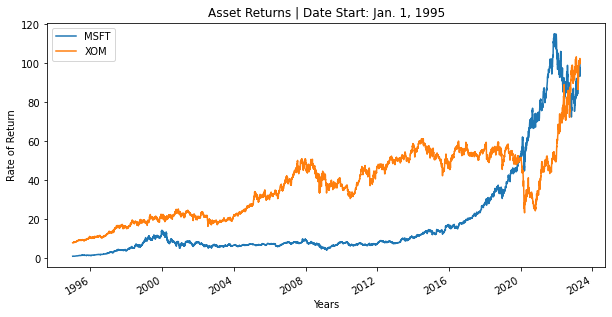

In [6]:
# graph the performance of the assets within the given timeframe AKA the rate of return for individual assets
(stooq_df / stooq_df.iloc[0] * 100).plot(figsize=(10, 5))

plt.title('Asset Returns | Date Start: Jan. 1, 1995')
plt.xlabel('Years')
plt.ylabel('Rate of Return')
plt.show()

In [7]:
# get the log rate of returns
log_returns = np.log(stooq_df / stooq_df.shift(1))
log_returns.head()

,MSFT,XOM
Date,,
2023-04-26,NaN,NaN
2023-04-25,-0.069932,0.009225
2023-04-24,0.022794,0.014315
2023-04-21,0.014061,-0.018702
2023-04-20,0.001224,-0.003194


In [8]:
# using the number 250 to represent active trading days
pfolio_mean = log_returns.mean() * 250
pfolio_mean

MSFT   -0.165290
XOM    -0.088651
dtype: float64

In [9]:
pfolio_cov = log_returns.cov() * 250
pfolio_cov

,MSFT,XOM
MSFT,0.098587,0.028271
XOM,0.028271,0.067649


In [10]:
pfolio_corr = log_returns.corr()
pfolio_corr

,MSFT,XOM
MSFT,1.000000,0.346189
XOM,0.346189,1.000000


In [11]:
count_assets = len(assets)
print(f'Total No. of Assets: {count_assets}')

Total No. of Assets: 2


In [12]:
# create random weights for each asset
weights = np.random.rand(count_assets)
weights

array([0.88445207, 0.0508433 ])

In [13]:
# function for finding sum array values
def sum_arr(num_arr):
    sum = 0

    for i in num_arr:
        sum = sum + i

    return(sum)

In [14]:
# get array total
array_total = sum_arr(weights)
array_total

0.9352953659335315

In [15]:
# create random weights for assets whose total equals 1
weights = np.random.random(count_assets)
weights /= np.sum(weights)
print(weights)
print('------')

array_total = sum_arr(weights)
array_total

[0.48666945 0.51333055]
------


1.0

#### Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

-0.12594869654272858

#### Expected Portfolio Variance:

In [17]:
np.dot(weights, np.dot(log_returns.cov() * 250, weights))

0.05530144725565557

#### Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights, np.dot(log_returns.cov() * 250, weights)))

0.23516259748449703

In [19]:
# user inputs how many iterations of weights for given assets
pfolio_returns = []
pfolio_volatilities = []

for x in range (int(2000)):
    weights = np.random.random(count_assets)
    weights /= np.sum(weights)
    pfolio_returns.append( np.sum( weights * log_returns.mean()) * 250)
    pfolio_volatilities.append( np.sqrt( np.dot( weights, np.dot( log_returns.cov() * 250, weights ) ) ) )

# store results as arrays
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [20]:
# create a dataframe to hold iterated portfolio values
portfolios = pd.DataFrame( {'Return': pfolio_returns, 'Volatility': pfolio_volatilities} )

In [21]:
# check top and bottom half of dataframe
portfolios.head()

,Return,Volatility
0,-0.134437,0.244438
1,-0.135878,0.246520
2,-0.100727,0.240755
3,-0.127543,0.236499
4,-0.106737,0.234888


In [22]:
portfolios.tail()

,Return,Volatility
1995,-0.142526,0.257862
1996,-0.148233,0.269669
1997,-0.142100,0.257054
1998,-0.118110,0.231482
1999,-0.117680,0.231422


#### Graphing Markowitz's Bullet

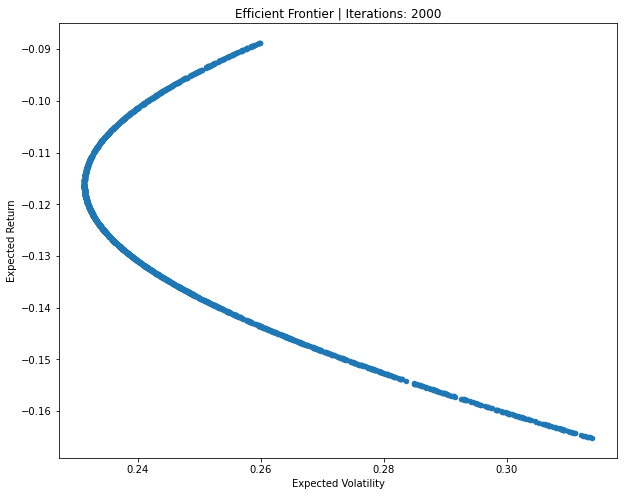

In [23]:
# plot the Efficient Frontier of the given assets and portfolio values
portfolios.plot( x='Volatility', y='Return', kind='scatter', figsize=(10, 8))
plt.title(f'Efficient Frontier | Iterations: 2000')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

plt.show()

## The Capital Asset Pricing Model

<p> The <i>Capital Assest Pricing Model</i> (CAPM) formula:
       <p> $r_{i} = r_{f} + \beta_{im}(r_{m}-r_{f})$

<p> The CAPM is a measure of the the risk and return of a security investment. There are three essential components to the CAPM:
    <ul>
    <li> Risk-Free Return ($r_{f}$)
    <li> Market Risk Premium ($r_{m}-r_{f}$) 
    <li> Beta of the investment ($\beta_{im}$)
    </ul>
    <p>The <i>Risk-Free Return</i> ($r_{f}$) is the value of an investment that carries zero risk. In reality there is no investment that carries a true risk rate equal to zero. A close investment that actually nears zero is the US 10-year government bond. This is because the US government is extremely unlikely not to pay back its bond holders - hence the near risk-free status and why it is often used in CAPM calculations for US markets.
<p>The <i> Market Risk Premium</i> $(r_{m}-r_{f})$ is the return that is expected from the portfolio beyond the risk-free assets. This premium rate is a strong determinant in whether or not pursuing the given portfolio will produce significant returns. In other words, this return is crucial in measuring portfolio performance in the CAPM.
<p> The <i> Beta</i> ($\beta_{im}$) is a measure of the stock's volatility. More specifically, this component of the CAPM is a measure of the idiosyncratic or unsystematic risk. This is the risk that can be mitigated through investment diversification throughout a portfolio.

#### Beta value

<p>We get the Beta value using the formula below:
    <p> $\large \beta = {Cov(r_{x},r_{m}) \over \sigma^{2}_{m}}$
        <br>
    <p>The Beta value indicates the relationship the investment has in relation to the market. In other words, this metric will show if an investment will or will not behave similarly to the rest of the market.
    <p> If $\beta = 0$, then the stock behaves indepdently of the market.
    <p> If $\beta < 1$, then the stock is <i>defensive</i> because they will lose less in poor markets - i.e. they are safe in poor markets.
    <p> If $\beta = 1$, then the stock performs the same as the market.
    <p> If $\beta > 1$, then the stock is <i>aggresive</i> because they are riskier investments BUT they perform better than the market.

In [24]:
# check portfolio covariance
pfolio_cov

,MSFT,XOM
MSFT,0.098587,0.028271
XOM,0.028271,0.067649


In [25]:
# get market variance for Microsoft stock (MSFT)
market_var = log_returns['MSFT'].var() * 250
market_var

0.09858704598422861

In [26]:
# calculate Beta
MSFT_beta = pfolio_cov.iloc[0,1] / market_var
round(MSFT_beta, 3)

0.287

Microsoft's low Beta value of <b>0.287</b> can mean that it is a less volatile and safer stock.

#### Calculate Expected Return for Microsoft (CAPM)

In [27]:
# set the return value for the Risk-Free asset AKA the 10-year US gov't bond
risk_free = 0.025

In [28]:
# set the Market Risk Premium as 0.05 or 5% (a market standard)
market_risk_prem = 0.05

In [29]:
MSFT_return = risk_free + (MSFT_beta * market_risk_prem)
round(MSFT_return, 3)

0.039

The Expected Return (CAPM) of Microsoft: <b>3.9%</b>

## The Sharpe Ratio

<p> The <i>Sharpe ratio</i> formula:
   <p> $\large {r_{i}-r_{f} \over\sigma_{i}}$
    <ul>
    <li> Risk-Free Return ($r_{f}$)
    <li> Return of the investment ($r_{i}$) 
    <li> Standard Deviation of the investment ($\sigma_{i}$)
    </ul>
<p>The Sharpe ratio is a metric used to calculate an investment or portfolio's risk-adjusted return. It also highlights any additional return that is gained after taking on the risk. 
<p>Considered simply, a higher Sharpe ratio or index indicates a better return <i> relative to the risk of the investment or the relationship of the investments in the portfolio</i>.

In [30]:
MSFT_sharpe = (MSFT_return - 0.025) / (log_returns['MSFT'].std() * 250 ** 0.5)
MSFT_sharpe

0.04566452293913532

In [31]:
print(f'The Sharpe Ratio of Microsoft: {round(MSFT_sharpe, 3)}')

The Sharpe Ratio of Microsoft: 0.046


The low Sharpe Ratio of <b>0.046</b> may indicate poor performance for Microsoft relative to the risk in our portfolio.